# MODUL


In [ ]:
! pip install -q kaggle

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import joblib
import pickle
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# DATA MAKANAN

In [ ]:
df_ayam = pd.read_csv('/content/dataset-ayam.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset-ayam.csv'

In [ ]:
df_ikan = pd.read_csv('/content/dataset-ikan.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset-ikan.csv'

In [ ]:
df_kambing = pd.read_csv('/content/dataset-kambing.csv')

In [ ]:
df_sapi = pd.read_csv('/content/dataset-sapi.csv')

In [ ]:
df_tahu = pd.read_csv('/content/dataset-tahu.csv')

In [ ]:
df_telur = pd.read_csv('/content/dataset-telur.csv')

In [ ]:
df_tempe = pd.read_csv('/content/dataset-tempe.csv')

In [ ]:
df_udang = pd.read_csv('/content/dataset-udang.csv')

In [ ]:
import pandas as pd

# Membaca kedua dataset
df_ayam = pd.read_csv('/content/dataset-ayam.csv')
df_ikan = pd.read_csv('/content/dataset-ikan.csv')
df_kambing = pd.read_csv('/content/dataset-kambing.csv')
df_sapi = pd.read_csv('/content/dataset-sapi.csv')
df_tahu = pd.read_csv('/content/dataset-tahu.csv')
df_telur = pd.read_csv('/content/dataset-telur.csv')
df_tempe = pd.read_csv('/content/dataset-tempe.csv')
df_udang = pd.read_csv('/content/dataset-udang.csv')

# Menambahkan atribut 'jenis_makanan' berdasarkan nama variabel
df_ayam['jenis_makanan'] = 'ayam'
df_ikan['jenis_makanan'] = 'ikan'
df_kambing['jenis_makanan'] = 'kambing'
df_sapi['jenis_makanan'] = 'sapi'
df_tahu['jenis_makanan'] = 'tahu'
df_telur['jenis_makanan'] = 'telur'
df_tempe['jenis_makanan'] = 'tempe'
df_udang['jenis_makanan'] = 'udang'

# Menggabungkan kedua dataset
df_combined = pd.concat([df_ayam, df_ikan, df_kambing, df_sapi, df_tahu, df_telur, df_tempe, df_udang], ignore_index=True)

# Menampilkan beberapa baris pertama dari dataset yang sudah digabung
print("\nDataset Gabungan:")
print(df_combined.head())


In [ ]:
df_combined.head(10)

In [ ]:
df_combined.info(10)

In [ ]:
df_combined.describe()

In [ ]:
df_combined.isna().sum()

In [ ]:
# Menghapus baris yang memiliki nilai kosong di kolom 'Ingredients' atau 'Steps'
df_combined_cleaned = df_combined.dropna(subset=['Ingredients', 'Steps'])

In [ ]:
df_combined_cleaned.isna().sum()

In [ ]:
df_combined.duplicated()

In [ ]:
# Menghapus baris dengan nilai "Loves" antara 1 dan 5
df_combined_filtered = df_combined[~df_combined['Loves'].isin([0 ,1, 2, 3, 4, 5])]
df_combined_filtered.head()


In [ ]:
unique_loves = df_combined_filtered['Loves'].unique()

In [ ]:
unique_loves

In [ ]:
df_combined_filtered.info()

In [ ]:
df_combined_filtered.to_csv('/content/dataset_combined_cleaned.csv', index=False)

# DATA GITHUB

In [ ]:
url = 'https://raw.githubusercontent.com/rootAmr/dataset/main/dataset%20-%20dataset_combined_cleaned.csv'

In [ ]:
import requests

In [ ]:
url2 = 'https://raw.githubusercontent.com/stopwords-iso/stopwords-id/master/stopwords-id.txt'
response = requests.get(url2)
if response.status_code == 200:
    with open('stopwords-id.txt', 'w', encoding='utf-8') as file:
        file.write(response.text)
    print('File downloaded and saved as stopwords-id.txt')
else:
    print(f'Failed to download the file. Status code: {response.status_code}')

File downloaded and saved as stopwords-id.txt


In [ ]:
# Membaca dataset dari GitHub
df_makanan = pd.read_csv(url)

# Created data

In [ ]:
df_makanan.head(5)

,Unnamed: 0,Title,Ingredients,Steps,Loves,URL,jenis makanan,Status,title_id,Status_makanan
0,0,Ayam Geprek,250 gr daging ayam saya pakai filletSecukupnya...,Goreng ayam ayam krispi Ulek bahan sambal camp...,10,idresep4473023ayamgeprek,Ayam,Tersuka,1,Ayam Tersuka
1,1,Steak ayam,300 gr dada ayam fillet1 sdm air jeruk nipisse...,Cuci bersih ayam iris tipis melebar rendam dgn...,6,idresep4472822steakayam,Ayam,Tersuka,2,Ayam Tersuka
2,2,Ayam Saos Asam Manis Simple,14 kg Ayam bagian dada fillet Potong daduSecuk...,Lumuri ayam yg sdh dipotong dadu dgn garam per...,6,idresep4472901ayamsaosasammanissimple,Ayam,Tersuka,3,Ayam Tersuka
3,3,Ayam Bakar Pedas Manis Resep Nila Sari,1 Ekor Ayam Broiler Ukuran JumboBumbu 5 Siung ...,Iris tipis bawang merah daun jerukHaluskan cab...,8,idresep4472362ayambakarpedasmanisresepnilasari,Ayam,Tersuka,4,Ayam Tersuka
4,4,Nugget Ayam Home Made,14 kg ayam d fillet ambil dagingnya aja1 buah ...,Cuci bersih ayam potong kecil2 Masukkan dlm bl...,6,idresep4472482nuggetayamhomemade,Ayam,Tersuka,5,Ayam Tersuka


In [ ]:
df_makanan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8922 entries, 0 to 8921
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      8922 non-null   int64   
 1   Title           8922 non-null   object  
 2   Ingredients     8922 non-null   object  
 3   Steps           8922 non-null   object  
 4   Loves           8922 non-null   int64   
 5   URL             8922 non-null   object  
 6   jenis makanan   8922 non-null   object  
 7   Status          8922 non-null   category
 8   title_id        8922 non-null   int64   
 9   Status_makanan  8922 non-null   object  
dtypes: category(1), int64(3), object(6)
memory usage: 636.4+ KB


In [ ]:
df_makanan.describe()

,Unnamed: 0,Loves,title_id
count,8922.000000,8922.000000,8922.000000
mean,4461.083389,18.449339,4461.500000
std,2576.376278,26.566542,2575.703884
min,0.000000,6.000000,1.000000
25%,2230.250000,7.000000,2231.250000
50%,4460.500000,10.000000,4461.500000
75%,6691.750000,19.000000,6691.750000
max,8923.000000,939.000000,8922.000000


In [ ]:
df_makanan.columns

Index(['Unnamed: 0', 'Title', 'Ingredients', 'Steps', 'Loves', 'URL',
       'jenis makanan', 'Status', 'title_id', 'Status_makanan'],
      dtype='object')

In [ ]:
df_makanan.shape

(8922, 10)

In [ ]:
df_makanan.isna().sum()

Unnamed: 0        0
Title             0
Ingredients       0
Steps             0
Loves             0
URL               0
jenis makanan     0
Status            0
title_id          0
Status_makanan    0
dtype: int64

In [ ]:
# Menghapus baris yang memiliki nilai kosong di kolom 'Ingredients'
df_makanan = df_makanan.dropna(subset=['Ingredients'])

In [ ]:
unique_loves = df_makanan['Loves'].unique()

In [ ]:
# Tentukan batas-batas kategori yang disesuaikan
batas_kategori = [0, 100, 200, 300, np.inf]
kategori = ['Tersuka', 'Terhangat', 'Terpanas', 'Terhot']

# Tambahkan kolom "Status" ke DataFrame
df_makanan['Status'] = pd.cut(df_makanan['Loves'], bins=batas_kategori, labels=kategori, right=False)

In [ ]:
unique_loves

array([ 10,   6,   8,  46,  15,   7,  35,  67,   9,  17,  21,  13, 164,
        12,  20,  33,  40,  30,  14,  11,  69,  27,  45,  43,  50,  22,
        60,  25, 123,  16,  37,  73,  36,  82,  31,  80,  24,  53,  44,
        71,  18,  63,  49,  39, 131,  83,  92,  56,  89,  48,  32, 116,
        19,  23,  51,  47, 130,  79,  58,  76,  29,  59,  55, 218,  38,
        68,  85,  57,  28,  65, 105,  72,  52, 102,  41,  26,  77,  42,
       169, 170, 115,  34,  62, 142,  96, 155, 237, 151, 194,  91,  54,
       166,  75,  94, 108, 149,  87, 121, 516, 242,  90,  88, 100,  86,
        61, 188, 117,  97, 196,  64, 134,  66, 197, 112, 111, 137, 168,
       126,  95,  84, 113, 101, 153, 355, 143,  81, 214, 337, 241, 103,
       342, 249,  70,  98,  74, 180, 171,  93, 145, 147, 195,  99,  78,
       375, 133, 118, 939, 135, 269, 127, 119, 106, 120, 132, 261, 481,
       107, 136, 139, 129, 124, 301, 104, 110, 192, 150, 114, 245, 160,
       167, 172, 280, 198, 157, 158, 452, 122, 144, 109])

In [ ]:
# Ubah huruf depan pada kolom "jenis makanan" menjadi huruf kapital
df_makanan['jenis makanan'] = df_makanan['jenis makanan'].str.capitalize()

In [ ]:
df_makanan

,Unnamed: 0,Title,Ingredients,Steps,Loves,URL,jenis makanan,Status,title_id,Status_makanan
0,0,Ayam Geprek,250 gr daging ayam saya pakai filletSecukupnya...,Goreng ayam ayam krispi Ulek bahan sambal camp...,10,idresep4473023ayamgeprek,Ayam,Tersuka,1,Ayam Tersuka
1,1,Steak ayam,300 gr dada ayam fillet1 sdm air jeruk nipisse...,Cuci bersih ayam iris tipis melebar rendam dgn...,6,idresep4472822steakayam,Ayam,Tersuka,2,Ayam Tersuka
2,2,Ayam Saos Asam Manis Simple,14 kg Ayam bagian dada fillet Potong daduSecuk...,Lumuri ayam yg sdh dipotong dadu dgn garam per...,6,idresep4472901ayamsaosasammanissimple,Ayam,Tersuka,3,Ayam Tersuka
3,3,Ayam Bakar Pedas Manis Resep Nila Sari,1 Ekor Ayam Broiler Ukuran JumboBumbu 5 Siung ...,Iris tipis bawang merah daun jerukHaluskan cab...,8,idresep4472362ayambakarpedasmanisresepnilasari,Ayam,Tersuka,4,Ayam Tersuka
4,4,Nugget Ayam Home Made,14 kg ayam d fillet ambil dagingnya aja1 buah ...,Cuci bersih ayam potong kecil2 Masukkan dlm bl...,6,idresep4472482nuggetayamhomemade,Ayam,Tersuka,5,Ayam Tersuka
...,...,...,...,...,...,...,...,...,...,...
8917,8919,Udang tepung dengan saus kecap,Bahan300 gr Udang1 btr TelurBumbu3 tepung saji...,Siapkan wadah 1tepung sajiku air dingin 1 buti...,20,idresep3795600udangtepungdengansauskecap,Udang,Tersuka,8918,Udang Tersuka
8918,8920,Udang saus mentega,1 kg udang segar1 buah bawang bombay kecil4 si...,Bersihkan udang siapkan bahan bahanTumis bawan...,46,idresep3794442udangsausmentega,Udang,Tersuka,8919,Udang Tersuka
8919,8921,Jipang tumis udang,500 gr jipangsaya pk 6bh jipang muda yg kecilp...,Tumis bawang merah bawang putih harumLalu masu...,6,idresep3795267jipangtumisudang,Udang,Tersuka,8920,Udang Tersuka
8920,8922,Tumis kacang panjang terong udang,Stgah ikat kacang panjangku bli 3ribu d psrTer...,Potong2 kacang panjangterong cuci bersih sisik...,12,idresep3794623tumiskacangpanjangterongudang,Udang,Tersuka,8921,Udang Tersuka


In [ ]:
# Menggunakan fungsi reset_index() untuk mengatur ulang indeks DataFrame agar dimulai dari 1
df_makanan['title_id'] = df_makanan.index + 1

# Tampilkan DataFrame dengan atribut baru "title_id"
df_makanan

,Unnamed: 0,Title,Ingredients,Steps,Loves,URL,jenis makanan,Status,title_id,Status_makanan
0,0,Ayam Geprek,250 gr daging ayam saya pakai filletSecukupnya...,Goreng ayam ayam krispi Ulek bahan sambal camp...,10,idresep4473023ayamgeprek,Ayam,Tersuka,1,Ayam Tersuka
1,1,Steak ayam,300 gr dada ayam fillet1 sdm air jeruk nipisse...,Cuci bersih ayam iris tipis melebar rendam dgn...,6,idresep4472822steakayam,Ayam,Tersuka,2,Ayam Tersuka
2,2,Ayam Saos Asam Manis Simple,14 kg Ayam bagian dada fillet Potong daduSecuk...,Lumuri ayam yg sdh dipotong dadu dgn garam per...,6,idresep4472901ayamsaosasammanissimple,Ayam,Tersuka,3,Ayam Tersuka
3,3,Ayam Bakar Pedas Manis Resep Nila Sari,1 Ekor Ayam Broiler Ukuran JumboBumbu 5 Siung ...,Iris tipis bawang merah daun jerukHaluskan cab...,8,idresep4472362ayambakarpedasmanisresepnilasari,Ayam,Tersuka,4,Ayam Tersuka
4,4,Nugget Ayam Home Made,14 kg ayam d fillet ambil dagingnya aja1 buah ...,Cuci bersih ayam potong kecil2 Masukkan dlm bl...,6,idresep4472482nuggetayamhomemade,Ayam,Tersuka,5,Ayam Tersuka
...,...,...,...,...,...,...,...,...,...,...
8917,8919,Udang tepung dengan saus kecap,Bahan300 gr Udang1 btr TelurBumbu3 tepung saji...,Siapkan wadah 1tepung sajiku air dingin 1 buti...,20,idresep3795600udangtepungdengansauskecap,Udang,Tersuka,8918,Udang Tersuka
8918,8920,Udang saus mentega,1 kg udang segar1 buah bawang bombay kecil4 si...,Bersihkan udang siapkan bahan bahanTumis bawan...,46,idresep3794442udangsausmentega,Udang,Tersuka,8919,Udang Tersuka
8919,8921,Jipang tumis udang,500 gr jipangsaya pk 6bh jipang muda yg kecilp...,Tumis bawang merah bawang putih harumLalu masu...,6,idresep3795267jipangtumisudang,Udang,Tersuka,8920,Udang Tersuka
8920,8922,Tumis kacang panjang terong udang,Stgah ikat kacang panjangku bli 3ribu d psrTer...,Potong2 kacang panjangterong cuci bersih sisik...,12,idresep3794623tumiskacangpanjangterongudang,Udang,Tersuka,8921,Udang Tersuka


In [ ]:
id = pd.read_csv('/content/tourism_rating.csv')

In [ ]:
id.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [ ]:
id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
# Jumlah entri yang ingin dicapai
total_entries = 150000

# Tentukan berapa kali DataFrame asli akan diulang untuk mencapai jumlah entri yang diinginkan
repeats = total_entries // len(id)

# Buat DataFrame baru dengan mengulang DataFrame asli sebanyak yang dibutuhkan
id_extended = pd.concat([id] * repeats, ignore_index=True)

# Jika ada sisa, tambahkan entri tambahan dari DataFrame asli
sisa = total_entries % len(id)
id= pd.concat([id_extended, id.head(sisa)], ignore_index=True)

# Tampilkan info DataFrame baru
print(id.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   User_Id        150000 non-null  int64
 1   Place_Id       150000 non-null  int64
 2   Place_Ratings  150000 non-null  int64
dtypes: int64(3)
memory usage: 3.4 MB
None


In [ ]:
id['User_Id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
id_makanan = df_makanan['title_id']

In [ ]:
id_makanan.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8922 entries, 0 to 8921
Series name: title_id
Non-Null Count  Dtype
--------------  -----
8922 non-null   int64
dtypes: int64(1)
memory usage: 69.8 KB


In [ ]:
id_makanan.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8922 entries, 0 to 8921
Series name: title_id
Non-Null Count  Dtype
--------------  -----
8922 non-null   int64
dtypes: int64(1)
memory usage: 69.8 KB


In [ ]:
id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   User_Id        150000 non-null  int64
 1   Place_Id       150000 non-null  int64
 2   Place_Ratings  150000 non-null  int64
dtypes: int64(3)
memory usage: 3.4 MB


In [ ]:
id.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [ ]:
print(id.columns)

Index(['User_Id', 'Place_Id', 'Place_Ratings'], dtype='object')


In [ ]:
# Menghapus atribut "Place_Id" dan "Place_Ratings" dari DataFrame "id"
id.drop(columns=['Place_Id'], inplace=True)

In [ ]:
id_makanan.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8922 entries, 0 to 8921
Series name: title_id
Non-Null Count  Dtype
--------------  -----
8922 non-null   int64
dtypes: int64(1)
memory usage: 69.8 KB


In [ ]:
id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   User_Id        150000 non-null  int64
 1   Place_Ratings  150000 non-null  int64
dtypes: int64(2)
memory usage: 2.3 MB


In [ ]:
id.head(100)

,User_Id,Place_Ratings
0,1,3
1,1,2
2,1,5
3,1,3
4,1,4
...,...,...
95,4,3
96,4,3
97,4,4
98,4,3


In [ ]:
# Gabungkan DataFrame id dengan id_makanan
data = id.assign(id_makanan=np.random.choice(id_makanan, size=len(id)))


In [ ]:
data.head(50)

,User_Id,Place_Ratings,id_makanan
0,1,3,2251
1,1,2,7031
2,1,5,4144
3,1,3,7749
4,1,4,972
5,1,2,246
6,1,5,595
7,1,4,7048
8,1,2,2060
9,1,5,2033


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   User_Id        150000 non-null  int64
 1   Place_Ratings  150000 non-null  int64
 2   id_makanan     150000 non-null  int64
dtypes: int64(3)
memory usage: 3.4 MB


In [ ]:
# Mencari baris di mana id_makanan memiliki nilai 6683
baris_6683 = data.loc[data['id_makanan'] == 6683]

# Menampilkan User_Id dari baris-baris tersebut
user_id_6683 = baris_6683['User_Id'].values.tolist()
print("User Id yang menggunakan id_makanan 6683:", user_id_6683)

User Id yang menggunakan id_makanan 6683: [222, 70, 74, 129, 220, 70, 147, 30, 103, 198, 216, 230, 42, 279, 66, 126]


In [ ]:
data.head()

,User_Id,Place_Ratings,id_makanan
0,1,3,2251
1,1,2,7031
2,1,5,4144
3,1,3,7749
4,1,4,972


In [ ]:
data.head()

,User_Id,Place_Ratings,id_makanan
0,1,3,2251
1,1,2,7031
2,1,5,4144
3,1,3,7749
4,1,4,972


In [ ]:
df_makanan.head()

,Unnamed: 0,Title,Ingredients,Steps,Loves,URL,jenis makanan,Status,title_id,Status_makanan
0,0,Ayam Geprek,250 gr daging ayam saya pakai filletSecukupnya...,Goreng ayam ayam krispi Ulek bahan sambal camp...,10,idresep4473023ayamgeprek,Ayam,Tersuka,1,Ayam Tersuka
1,1,Steak ayam,300 gr dada ayam fillet1 sdm air jeruk nipisse...,Cuci bersih ayam iris tipis melebar rendam dgn...,6,idresep4472822steakayam,Ayam,Tersuka,2,Ayam Tersuka
2,2,Ayam Saos Asam Manis Simple,14 kg Ayam bagian dada fillet Potong daduSecuk...,Lumuri ayam yg sdh dipotong dadu dgn garam per...,6,idresep4472901ayamsaosasammanissimple,Ayam,Tersuka,3,Ayam Tersuka
3,3,Ayam Bakar Pedas Manis Resep Nila Sari,1 Ekor Ayam Broiler Ukuran JumboBumbu 5 Siung ...,Iris tipis bawang merah daun jerukHaluskan cab...,8,idresep4472362ayambakarpedasmanisresepnilasari,Ayam,Tersuka,4,Ayam Tersuka
4,4,Nugget Ayam Home Made,14 kg ayam d fillet ambil dagingnya aja1 buah ...,Cuci bersih ayam potong kecil2 Masukkan dlm bl...,6,idresep4472482nuggetayamhomemade,Ayam,Tersuka,5,Ayam Tersuka


In [ ]:
import pandas as pd

# Menggabungkan data berdasarkan title_id dan id_makanan
df_combined = pd.merge(df_makanan, data, left_on='title_id', right_on='id_makanan', how='inner')

# Menghapus kolom id_makanan yang tidak diperlukan
df_combined.drop('id_makanan', axis=1, inplace=True)

# Menyertakan kolom Place_Ratings dari data ke dalam df_combined
df_combined['Place_Ratings'] = data['Place_Ratings']


In [ ]:
# Mengurutkan berdasarkan User_Id
df_combined_sorted = df_combined.sort_values(by='User_Id')

# Menggeser kolom User_Id ke bagian paling kiri
cols = list(df_combined_sorted.columns)
cols = ['User_Id'] + [col for col in cols if col != 'User_Id']
df_combined_sorted = df_combined_sorted[cols]

In [ ]:
# Menampilkan hasil
df_combined_sorted

,User_Id,Unnamed: 0,Title,Ingredients,Steps,Loves,URL,jenis makanan,Status,title_id,Status_makanan,Place_Ratings
20425,1,1215,Kari Gulai Gurame,6 ekor ikan gurame bersihkan dan goreng2 sdm b...,Siapkan wajan minyak menumis Tumis bumbu kari ...,6,idresep4448644karigulaigurame,Ikan,Tersuka,1216,Ikan Tersuka,4
1998,1,117,Egg salted chicken,1 iris fillet dada ayam potong kecilBumbu halu...,Masak ayam digoreng tepung biasaKemudian saus ...,7,idresep43989008eggsaltedchicken,Ayam,Tersuka,118,Ayam Tersuka,1
120987,1,7182,Sambal tempe penyet kemangi,1 papan tempe1 ikat daun kemangi siangibumbu y...,Potong tempe goreng Blender bumbu sambal trasi...,25,idresep3985579sambaltempepenyetkemangi,Tempe,Tersuka,7182,Tempe Tersuka,3
74443,1,4415,Sup Daging Sapi dan Sayuran,Beberapa iris daging sapiSayuran wortel kentan...,Iris kecil2 sayuran daging sapi sup bocilku yg...,18,idresep3366935supdagingsapidansayuran,Sapi,Tersuka,4416,Sapi Tersuka,2
24495,1,1452,Pindang Tongkol Asem Manis,2 Pindang Tongkol buang kepala dan duri1 bungk...,Bersihkan pindang tongkol goreng kecoklatanTum...,18,idresep4357513pindangtongkolasemmanis,Ikan,Tersuka,1453,Ikan Tersuka,1
...,...,...,...,...,...,...,...,...,...,...,...,...
122907,300,7294,Mangut tempe jamur tulang ayam ala fe,1 bungkus tempe12 kg jamur bulatsecukupnya Tul...,Tumis bumbu diulek hi ngga harum masukkan bumb...,17,idresep4058397manguttempejamurtulangayamalafe,Tempe,Tersuka,7294,Tempe Tersuka,3
149717,300,8908,Udang Tumis Sayur,1 kg Udang kecil dikupas1 ikat Kubis cina saya...,Bawang merahputihcabe tomat diris tumis harum ...,10,idresep3799487udangtumissayur,Udang,Tersuka,8907,Udang Tersuka,5
15338,300,913,Ayam Geprek Dower,250 gram Ayam kurleb 1 bungkus Tepung sasa tep...,Potong ayam kecilkecil cuci bersih perasan jer...,8,idresep3893156ayamgeprekdower,Ayam,Tersuka,914,Ayam Tersuka,1
132342,300,7855,Bakwan Sayur dan Udang,2 buah wortelserut korek apiKol diiris halus1 ...,Campur bahan tambahkan air tercampur jgn encer...,6,idresep4437703bakwansayurdanudang,Udang,Tersuka,7854,Udang Tersuka,4


In [ ]:
# Mengubah nama kolom dari "Place_Ratings" menjadi "Rating"
df_combined_sorted.rename(columns={'Place_Ratings': 'Rating'}, inplace=True)


In [ ]:
# Mengubah susunan kolom DataFrame
df_combined_sorted = df_combined_sorted.reindex(columns=['User_Id', 'title_id', 'Title', 'Rating', 'Status', 'Loves', 'jenis makanan', 'Ingredients', 'Steps', 'URL'])

In [ ]:
df_combined_sorted

,User_Id,title_id,Title,Rating,Status,Loves,jenis makanan,Ingredients,Steps,URL
20425,1,1216,Kari Gulai Gurame,4,Tersuka,6,Ikan,6 ekor ikan gurame bersihkan dan goreng2 sdm b...,Siapkan wajan minyak menumis Tumis bumbu kari ...,idresep4448644karigulaigurame
1998,1,118,Egg salted chicken,1,Tersuka,7,Ayam,1 iris fillet dada ayam potong kecilBumbu halu...,Masak ayam digoreng tepung biasaKemudian saus ...,idresep43989008eggsaltedchicken
120987,1,7182,Sambal tempe penyet kemangi,3,Tersuka,25,Tempe,1 papan tempe1 ikat daun kemangi siangibumbu y...,Potong tempe goreng Blender bumbu sambal trasi...,idresep3985579sambaltempepenyetkemangi
74443,1,4416,Sup Daging Sapi dan Sayuran,2,Tersuka,18,Sapi,Beberapa iris daging sapiSayuran wortel kentan...,Iris kecil2 sayuran daging sapi sup bocilku yg...,idresep3366935supdagingsapidansayuran
24495,1,1453,Pindang Tongkol Asem Manis,1,Tersuka,18,Ikan,2 Pindang Tongkol buang kepala dan duri1 bungk...,Bersihkan pindang tongkol goreng kecoklatanTum...,idresep4357513pindangtongkolasemmanis
...,...,...,...,...,...,...,...,...,...,...
122907,300,7294,Mangut tempe jamur tulang ayam ala fe,3,Tersuka,17,Tempe,1 bungkus tempe12 kg jamur bulatsecukupnya Tul...,Tumis bumbu diulek hi ngga harum masukkan bumb...,idresep4058397manguttempejamurtulangayamalafe
149717,300,8907,Udang Tumis Sayur,5,Tersuka,10,Udang,1 kg Udang kecil dikupas1 ikat Kubis cina saya...,Bawang merahputihcabe tomat diris tumis harum ...,idresep3799487udangtumissayur
15338,300,914,Ayam Geprek Dower,1,Tersuka,8,Ayam,250 gram Ayam kurleb 1 bungkus Tepung sasa tep...,Potong ayam kecilkecil cuci bersih perasan jer...,idresep3893156ayamgeprekdower
132342,300,7854,Bakwan Sayur dan Udang,4,Tersuka,6,Udang,2 buah wortelserut korek apiKol diiris halus1 ...,Campur bahan tambahkan air tercampur jgn encer...,idresep4437703bakwansayurdanudang


In [ ]:
# Menyimpan DataFrame sebagai file CSV
df_combined_sorted.to_csv('df_makan-nan.csv', index=False)


# EDA

In [ ]:
df_makanan = pd.read_csv('/content/df_makan-nan.csv')

In [ ]:
df_makanan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User_Id        150000 non-null  int64 
 1   title_id       150000 non-null  int64 
 2   Title          150000 non-null  object
 3   Rating         150000 non-null  int64 
 4   Status         150000 non-null  object
 5   Loves          150000 non-null  int64 
 6   jenis makanan  150000 non-null  object
 7   Ingredients    150000 non-null  object
 8   Steps          150000 non-null  object
 9   URL            150000 non-null  object
dtypes: int64(4), object(6)
memory usage: 11.4+ MB


In [ ]:
df_makanan.describe()

,User_Id,title_id,Rating,Loves
count,150000.000000,150000.000000,150000.000000,150000.000000
mean,151.292700,4450.173013,3.066500,18.502620
std,86.133354,2570.471930,1.379888,27.047907
min,1.000000,1.000000,1.000000,6.000000
25%,77.000000,2224.000000,2.000000,7.000000
50%,151.000000,4450.000000,3.000000,10.000000
75%,226.000000,6670.000000,4.000000,18.000000
max,300.000000,8922.000000,5.000000,939.000000


In [ ]:
df_makanan['Status_makanan'] = df_makanan[['jenis makanan','Status']].agg(' '.join,axis=1)

In [ ]:
df_makanan

,User_Id,title_id,Title,Rating,Status,Loves,jenis makanan,Ingredients,Steps,URL,Status_makanan
0,1,1216,Kari Gulai Gurame,4,Tersuka,6,Ikan,6 ekor ikan gurame bersihkan dan goreng2 sdm b...,Siapkan wajan minyak menumis Tumis bumbu kari ...,idresep4448644karigulaigurame,Ikan Tersuka
1,1,118,Egg salted chicken,1,Tersuka,7,Ayam,1 iris fillet dada ayam potong kecilBumbu halu...,Masak ayam digoreng tepung biasaKemudian saus ...,idresep43989008eggsaltedchicken,Ayam Tersuka
2,1,7182,Sambal tempe penyet kemangi,3,Tersuka,25,Tempe,1 papan tempe1 ikat daun kemangi siangibumbu y...,Potong tempe goreng Blender bumbu sambal trasi...,idresep3985579sambaltempepenyetkemangi,Tempe Tersuka
3,1,4416,Sup Daging Sapi dan Sayuran,2,Tersuka,18,Sapi,Beberapa iris daging sapiSayuran wortel kentan...,Iris kecil2 sayuran daging sapi sup bocilku yg...,idresep3366935supdagingsapidansayuran,Sapi Tersuka
4,1,1453,Pindang Tongkol Asem Manis,1,Tersuka,18,Ikan,2 Pindang Tongkol buang kepala dan duri1 bungk...,Bersihkan pindang tongkol goreng kecoklatanTum...,idresep4357513pindangtongkolasemmanis,Ikan Tersuka
...,...,...,...,...,...,...,...,...,...,...,...
149995,300,7294,Mangut tempe jamur tulang ayam ala fe,3,Tersuka,17,Tempe,1 bungkus tempe12 kg jamur bulatsecukupnya Tul...,Tumis bumbu diulek hi ngga harum masukkan bumb...,idresep4058397manguttempejamurtulangayamalafe,Tempe Tersuka
149996,300,8907,Udang Tumis Sayur,5,Tersuka,10,Udang,1 kg Udang kecil dikupas1 ikat Kubis cina saya...,Bawang merahputihcabe tomat diris tumis harum ...,idresep3799487udangtumissayur,Udang Tersuka
149997,300,914,Ayam Geprek Dower,1,Tersuka,8,Ayam,250 gram Ayam kurleb 1 bungkus Tepung sasa tep...,Potong ayam kecilkecil cuci bersih perasan jer...,idresep3893156ayamgeprekdower,Ayam Tersuka
149998,300,7854,Bakwan Sayur dan Udang,4,Tersuka,6,Udang,2 buah wortelserut korek apiKol diiris halus1 ...,Campur bahan tambahkan air tercampur jgn encer...,idresep4437703bakwansayurdanudang,Udang Tersuka


# Preparation

In [ ]:
df_makanan.isnull().sum()

User_Id           0
title_id          0
Title             0
Rating            0
Status            0
Loves             0
jenis makanan     0
Ingredients       0
Steps             0
URL               0
Status_makanan    0
dtype: int64

In [ ]:
df_makanan.drop_duplicates("title_id", inplace=True)

In [ ]:
# Simpan DataFrame df_makanan sebagai file CSV
df_makanan.to_csv('df_makanan-baru.csv', index=False)


#Content Based Filtering

In [ ]:
df_makanan.head(5)

,User_Id,title_id,Title,Rating,Status,Loves,jenis makanan,Ingredients,Steps,URL,Status_makanan
0,1,2034,Tumis ikan nila ala2,2,Tersuka,7,Ikan,1 kg ikan nila10 batang cabe ijo3 biji bawang ...,Bersihkan ikan lalu potong sesuai slerahgoreng...,idresep4023328tumisikannilaala2,Ikan Tersuka
1,1,2072,Pindang kuah ikan bandeng,1,Tersuka,16,Ikan,1 ekor bandeng ukuran besar dipotong jd 4 bagi...,Cuci ikan lalu lumuri dgn perasan jeruk nipis ...,idresep4027445pindangkuahikanbandeng,Ikan Tersuka
2,1,5650,Telur Masak Tomat,5,Tersuka,13,Telur,Bahan di kocok 4 butir telurSecukupnya lada bu...,Kocok lepas bahan telur goreng orak arik Sisih...,idresep4434911telurmasaktomat,Telur Tersuka
3,1,8158,Sayur Lodeh Udang,2,Tersuka,56,Udang,12 papan tempe potong2100 gr udang yg sudah di...,Siapkan bumbu yg sdh dipotongpotongTumis duo b...,idresep4245361sayurlodehudang,Udang Tersuka
4,1,8398,Sempol udang,3,Tersuka,23,Udang,250 gram udang500 gram tepung tapioka1 butir t...,Cuci udang n bersihhkan lalu haluskan udang me...,idresep4003072sempoludang,Udang Tersuka


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv.fit(df_makanan['Status_makanan'])

print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['ikan', 'tersuka', 'telur', 'udang', 'kambing', 'ayam', 'tahu', 'sapi', 'tempe', 'terhangat', 'terhot', 'terpanas']


In [ ]:
cv_matrix = cv.transform(df_makanan['Status_makanan'])

cv_matrix.shape

(8922, 12)

In [ ]:
cv_matrix.todense()

matrix([[0, 1, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = df_makanan.Title
).sample(5)

,ikan,tersuka,telur,udang,kambing,ayam,tahu,sapi,tempe,terhangat,terhot,terpanas
Title,,,,,,,,,,,,
Soto Bandung,0,0,0,1,0,0,0,0,0,0,1,0
Perkedel tahu,0,0,0,0,1,0,0,0,0,0,1,0
Idul Adha Daging Kambing Teriyaki Lada Hitam,0,0,1,0,0,0,0,0,0,0,1,0
Semur Kentang Tahu,0,0,0,0,1,0,0,0,0,0,1,0
Sayur Kare Daging Sapi,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(cv_matrix)
cosine_sim

array([[1. , 1. , 0.5, ..., 0.5, 0.5, 0.5],
       [1. , 1. , 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 1. , ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 1. , 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 1. , 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 1. ]])

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim,index=df_makanan['Title'],columns=df_makanan['Title'])
cosine_sim_df.sample(5,axis=1).sample(10,axis=0)

Title,Crispy Chicken,Ayam Goreng Bawang Khas Batam,Telur balado pedes bangettt,Siomay Udang dan AyamDimsum,Sambal balado telur dan ikan cue
Title,,,,,
SEMUR daging SAPI,0.5,0.5,0.5,0.5,0.5
Sayur Krecek Tahu Pedas,0.5,0.5,0.5,0.5,0.5
Saos kecap udang cocok utk cocolan,0.5,0.5,0.5,1.0,0.5
Tahu Petis musim ujan,0.5,0.5,0.5,0.5,0.5
Soto SapiSoto SegerSoto Bening,0.5,0.5,0.5,0.5,0.5
Sate Sapi dan Sate Tempe,0.5,0.5,0.5,0.5,0.5
Sate Kambing,0.5,0.5,0.5,0.5,0.5
Sup Ikan Tenggiri Laila Dawud,0.5,0.5,0.5,0.5,0.5
Tofu Daging Sapi,0.5,0.5,0.5,0.5,0.5


In [ ]:
def food_recomendation(place_name,similarity_data=cosine_sim_df,items=df_makanan[['Title','jenis makanan','Steps','Status']],k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    closest = closest.drop(place_name,errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
recommendations = food_recomendation("Soto Ayam")
recommendations

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

https://github.com/NicoLe-01/anime_recomendation_backend/blob/main/Sistem_Rekomendasi_Anime.ipynb

# Collaborative Filtering


In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
df = df_makanan[['User_Id', 'title_id', 'Rating']]

In [ ]:
recommended_places_df = df

In [ ]:
# Save DataFrame to a CSV file
recommended_places_df.to_csv('recommended_places.csv', index=False)

In [ ]:
df

,User_Id,title_id,Rating
0,1,1216,4
1,1,118,1
2,1,7182,3
3,1,4416,2
4,1,1453,1
...,...,...,...
60538,124,5684,2
65174,133,8476,4
69021,140,705,3
71843,145,5872,4


In [ ]:
user_ids = df.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [ ]:
title_ids = df.title_id.unique().tolist()

makanan_to_makanan_encoded = {x: i for i, x in enumerate(title_ids)}

makanan_encoded_to_makanan = {x: i for x, i in enumerate(title_ids)}

In [ ]:
df['user'] = df.User_Id.map(user_to_user_encoded)

df['makanan'] = df.title_id.map(makanan_to_makanan_encoded)

<ipython-input-161-6d4782715144>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df.User_Id.map(user_to_user_encoded)
<ipython-input-161-6d4782715144>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['makanan'] = df.title_id.map(makanan_to_makanan_encoded)


In [ ]:
num_users = len(user_to_user_encoded)

num_makanan = len(makanan_encoded_to_makanan)

df['title_id'] = df['title_id'].values.astype(np.float32)

min_rating = min(df['title_id'])

max_rating= max(df['title_id'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_makanan, min_rating, max_rating
))

Number of User: 120, Number of Place: 8922, Min Rating: 1.0, Max Rating: 8922.0


<ipython-input-162-a747533b073b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_id'] = df['title_id'].values.astype(np.float32)


In [ ]:
df = df.sample(frac=1,random_state=42)
df

,User_Id,title_id,Rating,user,makanan
9735,21,5873.0,2,20,5953
2923,7,5906.0,3,6,2481
291,1,3701.0,2,0,286
16266,34,7817.0,1,33,7469
21053,44,8595.0,4,43,8092
...,...,...,...,...,...
9163,20,5388.0,3,19,5734
7782,17,4613.0,1,16,5191
8270,18,267.0,4,17,5390
901,3,5899.0,4,2,860


In [ ]:
x = df[['user','makanan']].values

y = df['Rating'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.8 * df.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[  20 5953]
 [   6 2481]
 [   0  286]
 ...
 [  17 5390]
 [   2  860]
 [  31 7270]] [0.0001121  0.00022419 0.0001121  ... 0.00033629 0.00033629 0.00022419]


In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_makanan, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_makanan = num_makanan
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.makanan_embedding = layers.Embedding(
        num_makanan,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.makanan_bias = layers.Embedding(num_makanan, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    makanan_vector = self.makanan_embedding(inputs[:, 1]) # memanggil layer embedding 3
    makanan_bias = self.makanan_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_makanan = tf.tensordot(user_vector, makanan_vector, 2)

    x = dot_user_makanan + user_bias + makanan_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_makanan, 100)

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 10,
    validation_data = (x_val, y_val),
)

Epoch 1/10
893/893 [==============================] - 4s 5ms/step - loss: 0.0037 - root_mean_squared_error: 0.0021 - val_loss: 0.5182 - val_root_mean_squared_error: 0.4037
Epoch 2/10
893/893 [==============================] - 6s 7ms/step - loss: 0.0036 - root_mean_squared_error: 0.0020 - val_loss: 0.5168 - val_root_mean_squared_error: 0.4029
Epoch 3/10
893/893 [==============================] - 4s 4ms/step - loss: 0.0036 - root_mean_squared_error: 0.0019 - val_loss: 0.5153 - val_root_mean_squared_error: 0.4019
Epoch 4/10
893/893 [==============================] - 4s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0037 - val_loss: 0.5128 - val_root_mean_squared_error: 0.4005
Epoch 5/10
893/893 [==============================] - 6s 6ms/step - loss: 0.0036 - root_mean_squared_error: 0.0022 - val_loss: 0.5091 - val_root_mean_squared_error: 0.3982
Epoch 6/10
893/893 [==============================] - 4s 4ms/step - loss: 0.0037 - root_mean_squared_error: 0.0017 - val_loss: 0.5035 - val_

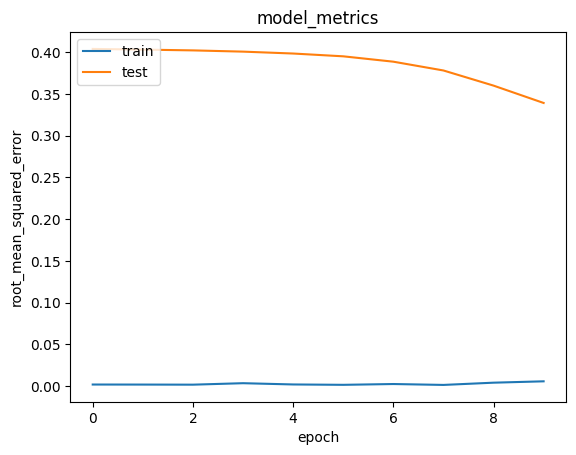

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Save the model
model.save_weights("recommender_model_weights.h5")

In [ ]:
# Load the weights
model.load_weights("recommender_model_weights.h5")

# Generate ratings for the user's interactions with unvisited makanans
ratings = model.predict(user_makanan_array).flatten()

# Select top recommendations
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_makanan_ids = [makanan_encoded_to_makanan.get(makanan_not_visited[x][0]) for x in top_ratings_indices]

# Display recommendations
print('Showing recommendations for user:', user_id)
print('=' * 30)
print('Top 10 recommended makanans:')
print('-' * 30)
recommended_makanan = makanan_df[makanan_df['User_Id'].isin(recommended_makanan_ids)]
recommended_makanan

4/4 [==============================] - 0s 3ms/step
Showing recommendations for user: 23
Top 10 recommended makanans:
------------------------------


,User_Id,title_id,Title,Rating,Status,Loves,jenis makanan,Ingredients,Steps,URL,Status_makanan
450,2,7287,Rendang tempe tahu,1,Tersuka,6,Tempe,1 set kecil kecap banggo1 bulet gula jawa1 sdt...,Gerus dlu bumbu2 kecuali gula y bun lumuran te...,idresep4236925rendangtempetahu,Tempe Tersuka
451,2,7453,Tempe Orek Basah Bumbu Ulek,2,Tersuka,53,Tempe,1 papan Tempe potong sesuai selera3 Pcs Cabe H...,Goreng tempe dipotong potong Goreng minyak pan...,idresep4045366tempeorekbasahbumbuulek,Tempe Tersuka
452,2,1540,Pesmol Ikan Nila,2,Tersuka,45,Ikan,2 ekor ikan nila sedang1 buah tomat1 buah jeru...,Taburi ikan jeruk nipis garam diamkan 15 menit...,idresep4325260pesmolikannila,Ikan Tersuka
453,2,129,Ayam balado,3,Tersuka,45,Ayam,6 potong ayam12 ons cabe merah5 butir bawang m...,Rebus ayam garam sebentar goreng keringUleg dg...,idresep4456862ayambalado,Ayam Tersuka
454,2,7698,Tahu tempe goreng,4,Tersuka,9,Tempe,secukupnya Tahu dan tempe2 siung bawang putih ...,Potong potong tempeKemudian rendam campuran ai...,idresep3958380tahutempegoreng,Tempe Tersuka
...,...,...,...,...,...,...,...,...,...,...,...
14343,30,417,Kung Pao Chicken,5,Terhangat,116,Ayam,ayam 500 gr dada ayam potong kecilkecil1 sdm ...,Aduk ayam kecap asin maizena SisihkanCampur ba...,idresep4420768kungpaochicken,Ayam Terhangat
14363,30,138,Sate Ayam Ponorogo,5,Tersuka,8,Ayam,400 gram daging ayam1 12 buah gula merah4 siun...,Fillet daging ayam sesuai selera sisihkanHalus...,idresep4454493sateayamponorogo,Ayam Tersuka
14365,30,8902,Sop Udang ala mommy Afya,2,Tersuka,12,Udang,12 kg Udang7 bawang merah5 bawang putih12 bh p...,Udangnya bersihkan cuci bersihBawang merah baw...,idresep3801058sopudangalamommyafya,Udang Tersuka
14377,30,737,Ayam geprek sambal dabudabu,1,Tersuka,15,Ayam,250 gr daging ayam2 bungkus tepung serbaguna1 ...,Cuci bersih ayamAdonan basah 1 bungkus tepung ...,idresep4365106ayamgepreksambaldabudabu,Ayam Tersuka


In [ ]:
import pandas as pd
import numpy as np

# Load necessary data
makanan_df = df_makanan
df = pd.read_csv('/content/recommended_places.csv')

# Select a user (you may want to randomly select a user here)
user_id = df.User_Id.sample(1).iloc[0]

# Identify makanans visited by the user
makanan_visited_by_user = df[df.User_Id == user_id]

# Identify makanans not visited by the user
makanan_not_visited = makanan_df[~makanan_df['User_Id'].isin(makanan_visited_by_user['title_id'].values)]['User_Id']
makanan_not_visited = list(set(makanan_not_visited).intersection(set(makanan_to_makanan_encoded.keys())))
makanan_not_visited = [[makanan_to_makanan_encoded.get(x)] for x in makanan_not_visited]

# Encode user and makanans for model input
user_encoder = user_to_user_encoded.get(user_id)
user_makanan_array = np.hstack(([[user_encoder]] * len(makanan_not_visited), makanan_not_visited))

# Generate ratings for the user's interactions with unvisited makanans
ratings = model.predict(user_makanan_array).flatten()

# Select top recommendations
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_makanan_ids = [makanan_encoded_to_makanan.get(makanan_not_visited[x][0]) for x in top_ratings_indices]

# Display recommendations
print('Showing recommendations for user:', user_id)
print('=' * 30)
print('Top 10 recommended makanans:')
print('-' * 30)
recommended_makanan = makanan_df[makanan_df['User_Id'].isin(recommended_makanan_ids)]
recommended_makanan

4/4 [==============================] - 0s 3ms/step
Showing recommendations for user: 23
Top 10 recommended makanans:
------------------------------


,User_Id,title_id,Title,Rating,Status,Loves,jenis makanan,Ingredients,Steps,URL,Status_makanan
450,2,7287,Rendang tempe tahu,1,Tersuka,6,Tempe,1 set kecil kecap banggo1 bulet gula jawa1 sdt...,Gerus dlu bumbu2 kecuali gula y bun lumuran te...,idresep4236925rendangtempetahu,Tempe Tersuka
451,2,7453,Tempe Orek Basah Bumbu Ulek,2,Tersuka,53,Tempe,1 papan Tempe potong sesuai selera3 Pcs Cabe H...,Goreng tempe dipotong potong Goreng minyak pan...,idresep4045366tempeorekbasahbumbuulek,Tempe Tersuka
452,2,1540,Pesmol Ikan Nila,2,Tersuka,45,Ikan,2 ekor ikan nila sedang1 buah tomat1 buah jeru...,Taburi ikan jeruk nipis garam diamkan 15 menit...,idresep4325260pesmolikannila,Ikan Tersuka
453,2,129,Ayam balado,3,Tersuka,45,Ayam,6 potong ayam12 ons cabe merah5 butir bawang m...,Rebus ayam garam sebentar goreng keringUleg dg...,idresep4456862ayambalado,Ayam Tersuka
454,2,7698,Tahu tempe goreng,4,Tersuka,9,Tempe,secukupnya Tahu dan tempe2 siung bawang putih ...,Potong potong tempeKemudian rendam campuran ai...,idresep3958380tahutempegoreng,Tempe Tersuka
...,...,...,...,...,...,...,...,...,...,...,...
14343,30,417,Kung Pao Chicken,5,Terhangat,116,Ayam,ayam 500 gr dada ayam potong kecilkecil1 sdm ...,Aduk ayam kecap asin maizena SisihkanCampur ba...,idresep4420768kungpaochicken,Ayam Terhangat
14363,30,138,Sate Ayam Ponorogo,5,Tersuka,8,Ayam,400 gram daging ayam1 12 buah gula merah4 siun...,Fillet daging ayam sesuai selera sisihkanHalus...,idresep4454493sateayamponorogo,Ayam Tersuka
14365,30,8902,Sop Udang ala mommy Afya,2,Tersuka,12,Udang,12 kg Udang7 bawang merah5 bawang putih12 bh p...,Udangnya bersihkan cuci bersihBawang merah baw...,idresep3801058sopudangalamommyafya,Udang Tersuka
14377,30,737,Ayam geprek sambal dabudabu,1,Tersuka,15,Ayam,250 gr daging ayam2 bungkus tepung serbaguna1 ...,Cuci bersih ayamAdonan basah 1 bungkus tepung ...,idresep4365106ayamgepreksambaldabudabu,Ayam Tersuka


# Model Mood

##Cleaning simbol

In [ ]:
df_makanan['jenis makanan'].unique()

array(['Ayam', 'Ikan', 'Kambing', 'Sapi', 'Tahu', 'Telur', 'Tempe',
       'Udang'], dtype=object)

In [ ]:
df_makanan['Title'].value_counts()

Title
Tongseng Kambing                  26
Beef Teriyaki                     24
Sapi Lada Hitam                   23
Tempe mendoan                     18
Perkedel tahu                     16
                                  ..
Shirataki kebuli                   1
Gulai Rebung udang kering          1
Nasi Kabsah with Basmathi Rice     1
Nasi Kebuli rice cooker            1
Siomay Udang Ayam                  1
Name: count, Length: 7233, dtype: int64

In [ ]:
# Menghitung jumlah data yang mengandung simbol "/"
jumlah_data_dengan_simbol = df_makanan['Title'].str.contains('/').sum()
print("Jumlah data yang mengandung simbol '/':", jumlah_data_dengan_simbol)

Jumlah data yang mengandung simbol '/': 0


In [ ]:
# Menghapus simbol "/" dari kolom 'Title'
df_makanan['Title'] = df_makanan['Title'].str.replace('/', '', regex=False)

In [ ]:
# Menghitung jumlah data yang mengandung simbol "/"
jumlah_data_dengan_simbol = df_makanan['Title'].str.contains(':').sum()
print("Jumlah data yang mengandung simbol '/':", jumlah_data_dengan_simbol)

Jumlah data yang mengandung simbol '/': 0


In [ ]:
# Read the stopwords from the file
stopwords_file = '/content/stopwords-id.txt'
with open(stopwords_file, 'r') as file:
    stopwords = file.read().splitlines()

In [ ]:
# Function to remove stopwords from a text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

In [ ]:
# Apply the remove_stopwords function to the 'caption' column
df_makanan['Steps'] = df_makanan['Steps'].apply(remove_stopwords)

In [ ]:
df_makanan['Steps'][0]

'Goreng ayam ayam krispi Ulek bahan sambal campur minyak panas bekas goreng ayam Geprek ayam campur sambalsajikan lalapan'

In [ ]:
# # create stemmer
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# def stemming_text(text):
#   stemmed = stemmer.stem(text)
#   return stemmed

In [ ]:
# # Apply the remove_stopwords function to the 'caption' column
# df_makanan['Steps'] = df_makanan['Steps'].apply(stemming_text)

In [ ]:
df_makanan.to_csv('reviews_cleaned.csv')

In [ ]:
df_makanan = pd.read_csv('/content/reviews_cleaned.csv')

## Model

In [ ]:
df_makanan.head()

,Unnamed: 0,Title,Ingredients,Steps,Loves,URL,jenis makanan,Status,title_id
0,0,Ayam Geprek,250 gr daging ayam saya pakai filletSecukupnya...,Goreng ayam ayam krispi Ulek bahan sambal camp...,10,idresep4473023ayamgeprek,Ayam,Tersuka,1
1,1,Steak ayam,300 gr dada ayam fillet1 sdm air jeruk nipisse...,Cuci bersih ayam iris tipis melebar rendam dgn...,6,idresep4472822steakayam,Ayam,Tersuka,2
2,2,Ayam Saos Asam Manis Simple,14 kg Ayam bagian dada fillet Potong daduSecuk...,Lumuri ayam yg sdh dipotong dadu dgn garam per...,6,idresep4472901ayamsaosasammanissimple,Ayam,Tersuka,3
3,3,Ayam Bakar Pedas Manis Resep Nila Sari,1 Ekor Ayam Broiler Ukuran JumboBumbu 5 Siung ...,Iris tipis bawang merah daun jerukHaluskan cab...,8,idresep4472362ayambakarpedasmanisresepnilasari,Ayam,Tersuka,4
4,4,Nugget Ayam Home Made,14 kg ayam d fillet ambil dagingnya aja1 buah ...,Cuci bersih ayam potong kecil2 Masukkan dlm bl...,6,idresep4472482nuggetayamhomemade,Ayam,Tersuka,5


In [ ]:
df_makanan['jenis makanan'].unique()

array(['ayam', 'ikan', 'kambing', 'sapi', 'tahu', 'telur', 'tempe',
       'udang'], dtype=object)

In [ ]:
# Sample labels
labels_list = df_makanan['Title']

# Create a dictionary to map labels to numerical indices
label_mapping = {label: index for index, label in enumerate(labels_list)}

# Print the label mapping
print(label_mapping)

{'Ayam Geprek': 881, 'Steak ayam': 704, 'Ayam Saos Asam Manis Simple': 2, 'Ayam Bakar Pedas Manis Resep Nila Sari': 3, 'Nugget Ayam Home Made': 4, 'Ayam Kecap Pedas Jeruk Limao': 5, 'Ayam Goreng Bumbu Kuning': 6, 'Ayam Asam Manis Rumahan citarasa Resto': 7, 'Ayam goreng tepung simple': 8, 'Sayap Goreng Bumbu Ngo Hiang': 9, 'Risoles rogut ayam': 10, 'Ayam masak kicap ala malay': 11, 'Ayam goreng bakar kecap': 12, 'Ayam Kecap Cabe Ijo': 13, 'Ayam Goreng Telur': 14, 'Ayam Goreng Pemalas': 15, 'Chicken Hainan  Nasi Hainan Simple Magic Com': 16, 'Ayam Ricarica super pedes': 17, 'Ayam Cabe Ijo': 873, 'Ayam fillet asam manis': 19, 'Ayam penyet ala sy': 20, 'Broccoli Rice with Grilled Chicken menu sehat': 21, 'Ayam goreng kremes renyah sambal trasi': 22, 'Mie ayam': 23, 'Tim Ayam Bawang': 24, 'Ayam richeese saos fire  keju': 25, 'Sup kembang tahu bakso ayam': 26, 'Ayam bumbu kuning': 993, 'Semur Ati Ayam Telur Puyuh Tahu': 4449, 'Soto Ayam Kampung': 804, 'Ayam saos nanas pedas manis': 30, 'Aya

In [ ]:
sentences = df_makanan['Steps'].values
labels = df_makanan['Title'].values

In [ ]:
# Assuming you have training_labels and validation_labels
labels_encoded = [label_mapping[label] for label in labels]

# Convert the lists to NumPy arrays if needed
labels_encoded = np.array(labels_encoded)

In [ ]:
training_sentences, validation_sentences, training_labels, validation_labels = train_test_split(sentences, labels_encoded, train_size=0.8, shuffle=True)

In [ ]:
print(training_sentences[0])
print(training_labels[0])

Potong tempe kecilkecil tipis tipis banget yaPanaskan minyak goreng goreng tempe sampa warnanya kecoklatan kering awas gosong ya angkat tiriskanHaluskan bumbu halusnya bawang merah putih garamPanaskan minyak goreng masukkan bumbu halus tumis harum masukkan cabai rawit yg dirajang daun jeruk yg diambil tulangnya laos jahe Tumis smpe harumMasukkan tempe digoreng aduk kecap garam gulaTes adukaduk dirasa bumbu meresap matikan komporTaraaa kering tempenyaa
7611


In [ ]:
df_makanan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8922 entries, 0 to 8921
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      8922 non-null   int64 
 1   Title           8922 non-null   object
 2   Ingredients     8922 non-null   object
 3   Steps           8922 non-null   object
 4   Loves           8922 non-null   int64 
 5   URL             8922 non-null   object
 6   jenis makanan   8922 non-null   object
 7   Status          8922 non-null   object
 8   title_id        8922 non-null   int64 
 9   Status_makanan  8922 non-null   object
dtypes: int64(3), object(7)
memory usage: 697.2+ KB


In [ ]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

In [ ]:
# Save the tokenizer using pickle
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Save the model
joblib.dump(tokenizer, "tokenizer2.pkl")

['tokenizer2.pkl']

In [ ]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8924, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(training_padded, training_labels, epochs=50,
          validation_data=(validation_padded, validation_labels),
          )

Epoch 1/50
224/224 [==============================] - 48s 188ms/step - loss: 9.1094 - accuracy: 0.0022 - val_loss: 9.1371 - val_accuracy: 0.0011
Epoch 2/50
224/224 [==============================] - 37s 167ms/step - loss: 8.9769 - accuracy: 0.0028 - val_loss: 9.3058 - val_accuracy: 0.0011
Epoch 3/50
224/224 [==============================] - 40s 179ms/step - loss: 8.8127 - accuracy: 0.0032 - val_loss: 9.7273 - val_accuracy: 0.0011
Epoch 4/50
224/224 [==============================] - 38s 171ms/step - loss: 8.7062 - accuracy: 0.0025 - val_loss: 9.9544 - val_accuracy: 0.0011
Epoch 5/50
224/224 [==============================] - 39s 171ms/step - loss: 8.6182 - accuracy: 0.0032 - val_loss: 10.1470 - val_accuracy: 0.0011
Epoch 6/50
224/224 [==============================] - 38s 167ms/step - loss: 8.5059 - accuracy: 0.0034 - val_loss: 10.4103 - val_accuracy: 0.0017
Epoch 7/50
224/224 [==============================] - 37s 167ms/step - loss: 8.4117 - accuracy: 0.0029 - val_loss: 10.5405 - val

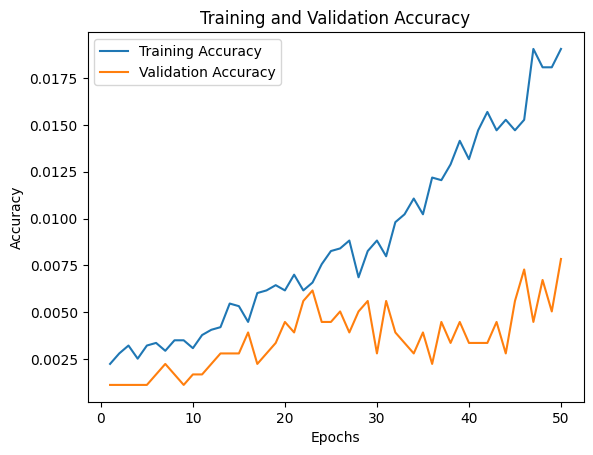

In [ ]:
# Extracting accuracy and validation accuracy from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the accuracy
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('model_v3.h5')

NameError: name 'model' is not defined

In [ ]:
joblib.dump(model, "model_v3.pkl")

NameError: name 'model' is not defined

In [ ]:
dic_label = df_makanan['Title']

In [ ]:
from tensorflow.keras.models import load_model

# Assuming you have loaded your real data into a variable called 'real_data'
real_data = ["makanan yang tidak memakai telur"]

# Assuming 'tokenizer' and 'label_tokenizer' are already defined as in your code
real_data_sequences = tokenizer.texts_to_sequences(real_data)
real_data_padded = pad_sequences(real_data_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

# Load the trained model
model = load_model('model_v3.h5')  # Replace 'your_model.h5' with the actual filename

# Make predictions
predictions = model.predict(real_data_padded)

# Get the top N predictions
top_n = 3
top_indices = np.argsort(predictions[0])[-top_n:][::-1]
top_probabilities = predictions[0][top_indices]

# Get the corresponding labels
top_labels = [dic_label.get(index, "Unknown") for index in top_indices]

# Print the top N predictions
print(f"Top {top_n} Predictions:")
for label, probability in zip(top_labels, top_probabilities):
    print(f"Label: {label}, Probability: {probability}")

1/1 [==============================] - 1s 617ms/step
Top 3 Predictions:
Label: Tahu Walik Isi Ayam, Probability: 0.016681309789419174
Label: Tahu telor, Probability: 0.015538002364337444
Label: Oseng pare telur, Probability: 0.013080117292702198


# Model kata
